<a href="https://colab.research.google.com/github/desdjajamahesa/fuzzy-trading-dss/blob/main/notebooks/Fuzzy_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount Google Drive
from google.colab import drive

print("Mounting Google Drive...")
drive.mount('/content/drive')

# Import Library
import os

# Definisikan Path ke Folder Dataset
dataset_folder = "/content/drive/MyDrive/Colab Notebooks/Fuzzy Trading/datasets"

# List Semua File di Folder Dataset
file_list = [file for file in os.listdir(dataset_folder) if file.endswith(".csv")]

# Tampilkan Jumlah dan Nama File CSV
print(f"\nTotal file CSV yang ditemukan: {len(file_list)}")
print("Nama file yang ditemukan:")
for idx, file_name in enumerate(file_list, start=1):
    print(f"{idx}. {file_name}")

Mounting Google Drive...
Mounted at /content/drive

Total file CSV yang ditemukan: 4
Nama file yang ditemukan:
1. BBNI.JK_10_years.csv
2. BBRI.JK_10_years.csv
3. BMRI.JK_10_years.csv
4. BBCA.JK_10_years.csv


In [ ]:
import pandas as pd

# Agar Visualisasi Data Lebih Rapih
pd.set_option('display.max_columns', None)  # Tampilkan semua kolom
pd.set_option('display.expand_frame_repr', False)  # Hindari pemotongan kolom ke garis baru
pd.set_option('display.max_rows', 10)  # Batas maksimal baris yang ditampilkan

# Eksplorasi Awal untuk Setiap File CSV
print("---Eksplorasi Data--- :")
for idx, file_name in enumerate(file_list, start=1):
    file_path = os.path.join(dataset_folder, file_name)
    print(f"\n--- {idx}. {file_name} ---")

    # Membaca dataset
    df = pd.read_csv(file_path)

    # Tampilkan informasi dasar
    print(f"Shape : {df.shape}")
    print("Kolom Dataset :")
    print(df.columns.tolist())

    # Periksa 5 baris pertama
    print("\n5 Baris Pertama :")
    print(df.head())

    # Periksa Nilai Hilang
    print("\nNilai Hilang di Setiap Kolom :")
    print(df.isnull().sum())

---Eksplorasi Data--- :

--- 1. BBNI.JK_10_years.csv ---
Shape : (2473, 7)
Kolom Dataset :
['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

5 Baris Pertama :
                        Date    Adj Close   Close    High     Low    Open    Volume
0  2014-12-08 00:00:00+00:00  2277.288086  2987.5  3100.0  2962.5  3062.5  64048400
1  2014-12-09 00:00:00+00:00  2258.231201  2962.5  3000.0  2950.0  2962.5  43373200
2  2014-12-10 00:00:00+00:00  2296.344727  3012.5  3037.5  2962.5  2962.5  39428200
3  2014-12-11 00:00:00+00:00  2277.288086  2987.5  3012.5  2975.0  2987.5  52932200
4  2014-12-12 00:00:00+00:00  2286.816650  3000.0  3062.5  2975.0  3000.0  41642800

Nilai Hilang di Setiap Kolom :
Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

--- 2. BBRI.JK_10_years.csv ---
Shape : (2473, 7)
Kolom Dataset :
['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

5 Baris Pertama :
                      


--- Visualisasi Data: Close vs Adj Close ---


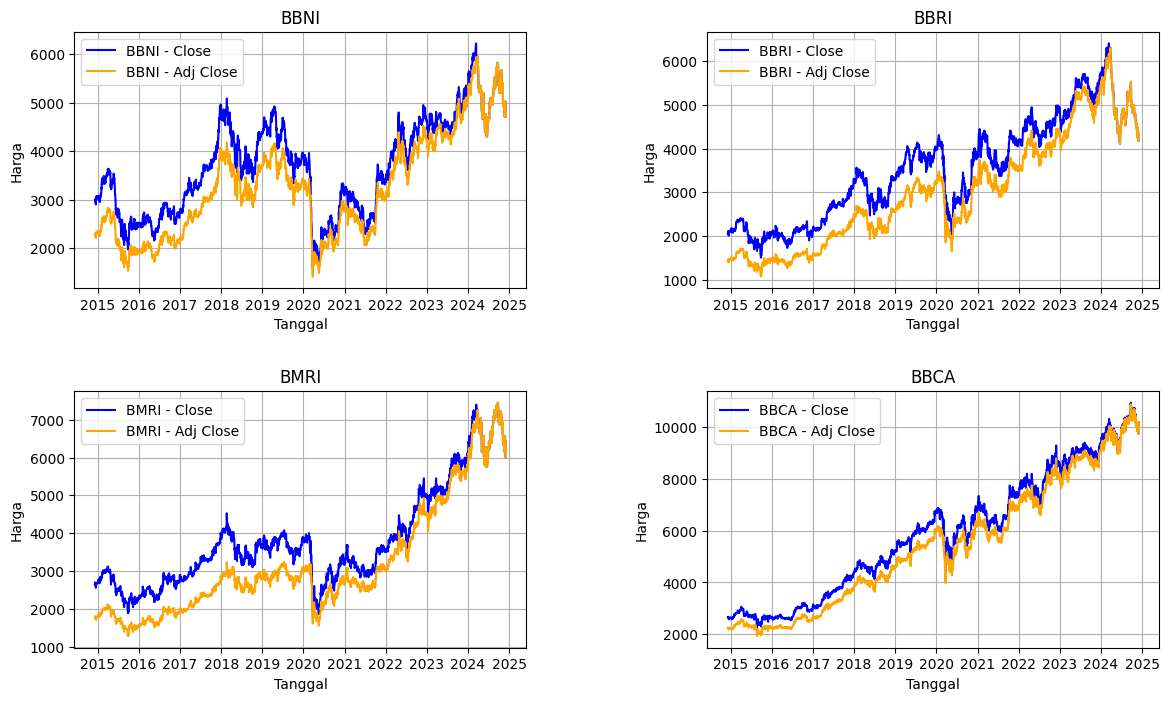

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi Grafik untuk Setiap Bank
print("\n--- Visualisasi Data: Close vs Adj Close ---")
fig, axes = plt.subplots(nrows=(len(file_list) + 1) // 2, ncols=2, figsize=(14, 8))  # Dua kolom
axes = axes.flatten()  # Untuk mengakses subplot dengan indexing sederhana

for idx, file_name in enumerate(file_list):
    file_path = os.path.join(dataset_folder, file_name)
    df = pd.read_csv(file_path)

    # Pastikan kolom 'Date' dalam format datetime
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])

    # Pastikan kolom 'Close' dan 'Adj Close' ada
    if 'Close' in df.columns and 'Adj Close' in df.columns:
        ax = axes[idx]
        ax.plot(df['Date'], df['Close'], label=f"{file_name.split('.')[0]} - Close", color='blue')
        ax.plot(df['Date'], df['Adj Close'], label=f"{file_name.split('.')[0]} - Adj Close", color='orange')
        ax.set_title(f"{file_name.split('.')[0]}")
        ax.set_xlabel("Tanggal")
        ax.set_ylabel("Harga")
        ax.legend()
        ax.grid(True)

# Kosongkan subplot yang tidak terpakai (jika jumlah file ganjil)
for ax in axes[len(file_list):]:
    ax.axis('off')

# Tambahkan jarak antar subplot
plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Jarak vertikal dan horizontal
plt.show()

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import os

# Step 1: Definisikan Variabel Fuzzy
price = ctrl.Antecedent(np.arange(0, 10000, 1), 'price')  # Harga saham (0-10000)
volume = ctrl.Antecedent(np.arange(0, 1000000000, 1000), 'volume')  # Volume perdagangan (hingga 1 miliar)
decision = ctrl.Consequent(np.arange(0, 3, 1), 'decision')  # Keputusan (0: Buy, 1: Hold, 2: Sell)

# Step 2: Definisikan Fungsi Keanggotaan
price['low'] = fuzz.trimf(price.universe, [0, 0, 5000])
price['medium'] = fuzz.trimf(price.universe, [3000, 5000, 8000])
price['high'] = fuzz.trimf(price.universe, [6000, 10000, 10000])

volume['low'] = fuzz.trimf(volume.universe, [0, 0, 500000000])
volume['medium'] = fuzz.trimf(volume.universe, [200000000, 500000000, 800000000])
volume['high'] = fuzz.trimf(volume.universe, [600000000, 1000000000, 1000000000])

decision['buy'] = fuzz.trimf(decision.universe, [0, 0, 1])
decision['hold'] = fuzz.trimf(decision.universe, [0, 1, 2])
decision['sell'] = fuzz.trimf(decision.universe, [1, 2, 2])

# Step 3: Definisikan Aturan Fuzzy
rule1 = ctrl.Rule(price['low'] & volume['high'], decision['buy'])
rule2 = ctrl.Rule(price['medium'] & volume['medium'], decision['hold'])
rule3 = ctrl.Rule(price['high'] | volume['low'], decision['sell'])

# Step 4: Sistem Kontrol Fuzzy
trading_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
trading_simulation = ctrl.ControlSystemSimulation(trading_ctrl)

# Step 5: Daftar Path File Dataset
dataset_files = {
    "BBCA": "/content/drive/MyDrive/Colab Notebooks/Fuzzy Trading/datasets/BBCA.JK_10_years.csv",
    "BBRI": "/content/drive/MyDrive/Colab Notebooks/Fuzzy Trading/datasets/BBRI.JK_10_years.csv",
    "BBNI": "/content/drive/MyDrive/Colab Notebooks/Fuzzy Trading/datasets/BBNI.JK_10_years.csv",
    "BMRI": "/content/drive/MyDrive/Colab Notebooks/Fuzzy Trading/datasets/BMRI.JK_10_years.csv"
}

# Step 6: Proses Dataset untuk Setiap Bank
processed_data = {}
for bank_name, file_path in dataset_files.items():
    try:
        # Membaca dataset
        df = pd.read_csv(file_path)

        if 'Close' in df.columns and 'Volume' in df.columns and 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])
            decisions = []

            for _, row in df.iterrows():
                # Validasi input
                if row['Close'] <= 0 or row['Close'] > 10000 or row['Volume'] <= 0 or row['Volume'] > 1000000000:
                    decisions.append("INVALID")
                    continue

                # Masukkan input ke sistem fuzzy
                trading_simulation.input['price'] = row['Close']
                trading_simulation.input['volume'] = row['Volume']
                trading_simulation.compute()

                # Normalisasi output fuzzy
                decision_output = max(0, min(2, trading_simulation.output['decision']))

                # Tentukan keputusan
                if decision_output < 0.5:
                    decisions.append("BUY")
                elif decision_output < 1.5:
                    decisions.append("HOLD")
                else:
                    decisions.append("SELL")

            # Tambahkan kolom hasil keputusan ke dataset
            df['Decision'] = decisions
            processed_data[bank_name] = df

            # Tampilkan 10 data secara random
            random_sample = df[['Date', 'Close', 'Volume', 'Decision']].sample(n=50, random_state=42)
            print(f"\nHasil Keputusan untuk {bank_name}:")
            print(random_sample)
        else:
            print(f"Kolom 'Close', 'Volume', atau 'Date' tidak ditemukan dalam file {file_path}")
    except Exception as e:
        print(f"Error memproses file {file_path} untuk {bank_name}: {e}")


Hasil Keputusan untuk BBCA:
                          Date  Close     Volume Decision
1058 2019-02-21 00:00:00+00:00   5505   54561500     SELL
2179 2023-09-14 00:00:00+00:00   9100  112757900     SELL
1709 2021-10-08 00:00:00+00:00   7290   94643500     SELL
1550 2021-02-15 00:00:00+00:00   6800   83922000     SELL
353  2016-05-19 00:00:00+00:00   2595  105881500     SELL
...                        ...    ...        ...      ...
1114 2019-05-10 00:00:00+00:00   5610   76130500     SELL
2291 2024-02-28 00:00:00+00:00  10000   54043100     SELL
1842 2022-04-21 00:00:00+00:00   7925  129323400     SELL
2211 2023-10-31 00:00:00+00:00   8750   64907600     SELL
2251 2023-12-28 00:00:00+00:00   9400   70184600     SELL

[50 rows x 4 columns]
Error memproses file /content/drive/MyDrive/Colab Notebooks/Fuzzy Trading/datasets/BBRI.JK_10_years.csv untuk BBRI: 'decision'

Hasil Keputusan untuk BBNI:
                          Date   Close     Volume Decision
1058 2019-02-21 00:00:00+00:00  4462.


--- Visualisasi Distribusi Keputusan ---


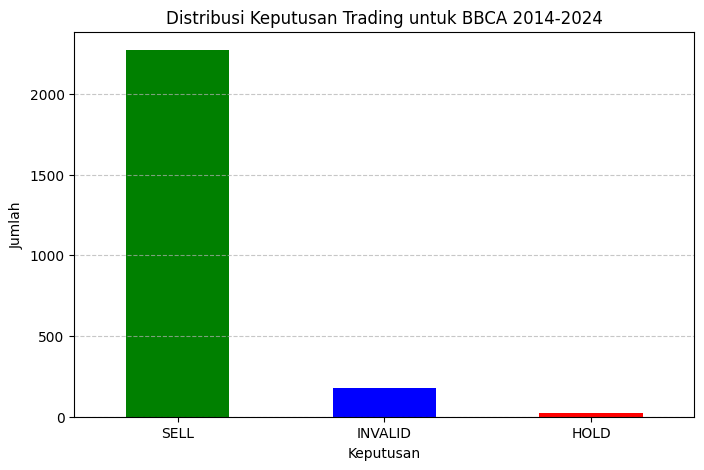

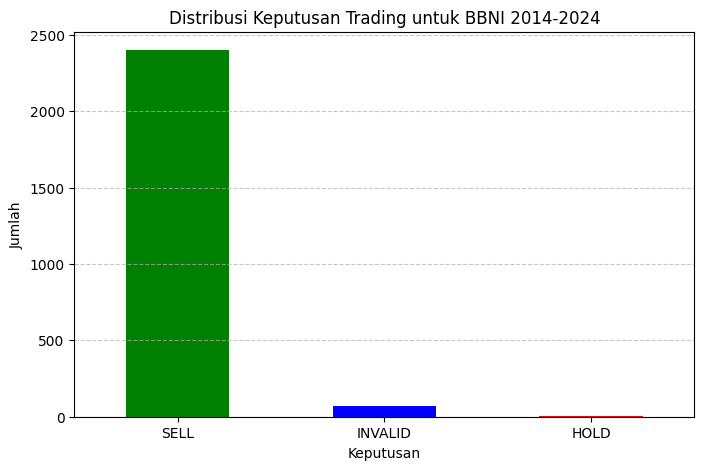

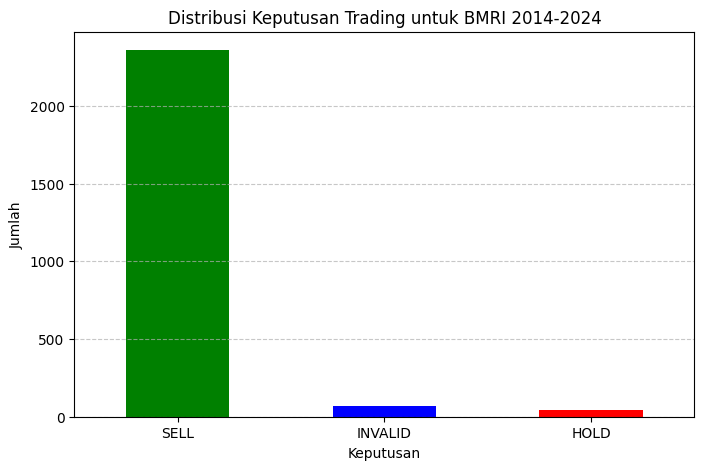

In [ ]:
import matplotlib.pyplot as plt

print("\n--- Visualisasi Distribusi Keputusan ---")
for bank_name, df in processed_data.items():
    decision_counts = df['Decision'].value_counts()
    plt.figure(figsize=(8, 5))
    decision_counts.plot(kind='bar', color=['green', 'blue', 'red'])
    plt.title(f"Distribusi Keputusan Trading untuk {bank_name} 2014-2024")
    plt.xlabel("Keputusan")
    plt.ylabel("Jumlah")
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


--- Analisis Keputusan Menggunakan Pie Chart ---

Analisis untuk BBCA :
Distribusi Keputusan :
Decision
SELL       91.83
INVALID     7.16
HOLD        1.01
Name: count, dtype: float64


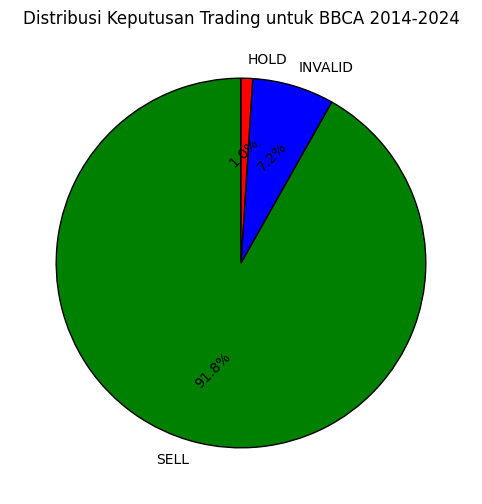


Analisis untuk BBNI :
Distribusi Keputusan :
Decision
SELL       97.05
INVALID     2.71
HOLD        0.24
Name: count, dtype: float64


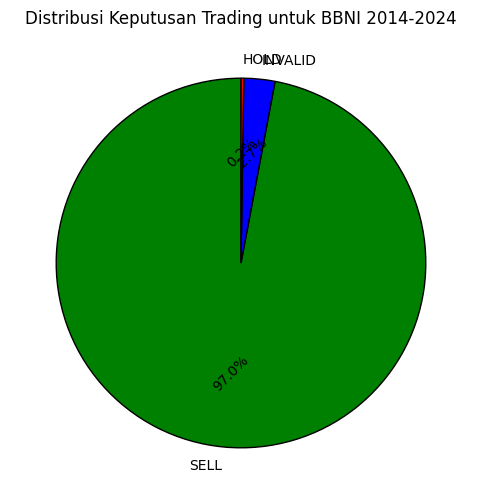


Analisis untuk BMRI :
Distribusi Keputusan :
Decision
SELL       95.39
INVALID     2.75
HOLD        1.86
Name: count, dtype: float64


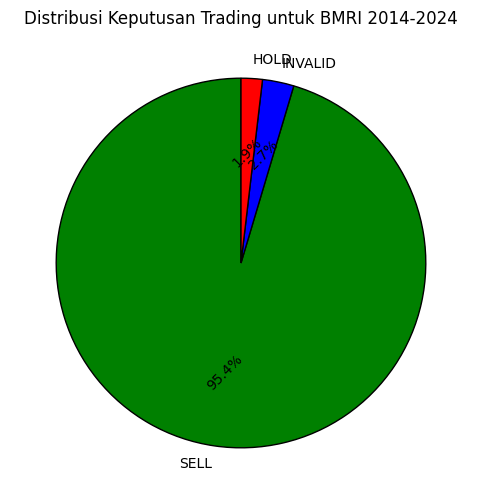

In [ ]:
# Analisis Keputusan dengan Penyesuaian Label Pie Chart
from matplotlib import pyplot as plt

print("\n--- Analisis Keputusan Menggunakan Pie Chart ---")

for bank_name, df in processed_data.items():
    # Hitung distribusi keputusan
    decision_counts = df['Decision'].value_counts()
    total_decisions = decision_counts.sum()
    decision_percentages = (decision_counts / total_decisions) * 100

    # Tampilkan persentase keputusan
    print(f"\nAnalisis untuk {bank_name} :")
    print("Distribusi Keputusan :")
    print(decision_percentages.round(2))

    # Fungsi untuk format label autopct secara diagonal
    def autopct_format(pct):
        if pct > 0:
            return f'{pct:.1f}%'
        else:
            return ''

    # Visualisasi dengan Pie Chart
    plt.figure(figsize=(8, 6))
    wedges, texts, autotexts = plt.pie(
        decision_percentages,
        autopct=autopct_format,
        colors=['green', 'blue', 'red', 'gray'],  # Tambahkan warna untuk 'INVALID'
        startangle=90,
        labels=decision_percentages.index,
        wedgeprops={'edgecolor': 'black'}
    )

    # Sesuaikan posisi teks diagonal
    for autotext in autotexts:
        autotext.set_rotation(45)  # Putar label persentase mengikuti area pie

    # Atur judul
    plt.title(f"Distribusi Keputusan Trading untuk {bank_name} 2014-2024")
    plt.ylabel("")  # Hilangkan label Y
    plt.show()